In [6]:
###################
#EDA and Preprocessing
###################
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
#Reading in data
df = pd.read_csv('Data/SpotifyData.csv')
df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
#df.head()

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Genre/Mood,Language,release_year
0,Tu Hi Hain Aashiqui,"Dishkiyaoon (feat. Palak Muchhal, Gayatri Ganj...",Various Artists,2014-03-12,298053,0,0.484,0.537,0.484,0.553,0.000000,0.0876,-5.384,0.0277,99.585,4,Hip-Hop,Hindi,2014
1,Tu Bin Bataye,Rang De Basanti (Original Motion Picture Sound...,A.R. Rahman,2005-12-04,357626,43,0.528,0.399,0.528,0.427,0.018800,0.0931,-10.848,0.0325,120.076,4,Hip-Hop,Hindi,2005
2,"Ajj Din Chadheya (From ""Love Aaj Kal "")",Love Aaj Kal,Pritam,2009-06-27,315013,44,0.585,0.551,0.585,0.687,0.000007,0.1210,-4.553,0.0724,85.871,4,Hip-Hop,Hindi,2009
3,"Main Jahaan Rahoon (From ""Namastey London"")",Namastey London,Himesh Reshammiya,2007-01-27,382493,43,0.584,0.362,0.584,0.556,0.000029,0.1300,-8.980,0.0514,103.739,4,Hip-Hop,Hindi,2007
4,Kaisa Yeh Junoon,Greatest Collection - Rahat Fateh Ali Khan,Rahat Fateh Ali Khan,2010-03-29,250453,26,0.669,0.655,0.669,0.517,0.000000,0.0913,-6.784,0.0277,115.977,4,Hip-Hop,Hindi,2010


In [3]:
df.info() #Need to encode categorical variables such as Genre/Mood and Language

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1253 non-null   object 
 1   album             1253 non-null   object 
 2   artist            1253 non-null   object 
 3   release_date      1253 non-null   object 
 4   length            1253 non-null   int64  
 5   popularity        1253 non-null   int64  
 6   danceability      1253 non-null   float64
 7   acousticness      1253 non-null   float64
 8   danceability.1    1253 non-null   float64
 9   energy            1253 non-null   float64
 10  instrumentalness  1253 non-null   float64
 11  liveness          1253 non-null   float64
 12  loudness          1253 non-null   float64
 13  speechiness       1253 non-null   float64
 14  tempo             1253 non-null   float64
 15  time_signature    1253 non-null   int64  
 16  Genre/Mood        1253 non-null   object 


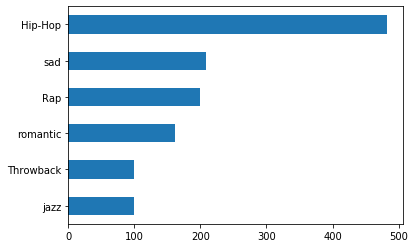

In [4]:
#Check each genre/mood
df['Genre/Mood'].value_counts().sort_values().plot(kind = 'barh')

In [5]:
#426 unique artists in dataset
len(df['artist'].unique())

426

In [6]:
#Check for 10 most frequent artists
n = 10
df['artist'].value_counts()[:n].index.tolist()

['Post Malone',
 'XXXTENTACION',
 'Drake',
 'The Weeknd',
 'Various Artists',
 'Vishal-Shekhar',
 'Shankar-Ehsaan-Loy',
 '50 Cent',
 'Pritam',
 'Jatin-Lalit']

In [7]:
#Check for most frequent artists by genre
group_genre = df.groupby("Genre/Mood")["artist"].value_counts().nlargest(15)
group_genre

Genre/Mood  artist            
Hip-Hop     Post Malone           56
sad         XXXTENTACION          53
            Drake                 44
Hip-Hop     The Weeknd            41
Throwback   Vishal-Shekhar        30
            Shankar-Ehsaan-Loy    25
Rap         50 Cent               23
Hip-Hop     Various Artists       18
romantic    Various Artists       18
Throwback   Jatin-Lalit           15
jazz        Miles Davis           13
Hip-Hop     Maluma                12
sad         Lewis Capaldi         12
Hip-Hop     Sachin-Jigar          11
Rap         Lil Uzi Vert          11
Name: artist, dtype: int64

In [8]:
#Preprocessing need to encode categorical variables in genre/mood and language
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
encodedVariables = df[['Genre/Mood','Language']]
enc.fit(encodedVariables[["Genre/Mood","Language"]])
encodedVariables[["Genre/Mood","Language"]] = enc.transform(encodedVariables[["Genre/Mood","Language"]])

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [9]:
#Ensuring different genres are encoded
encodedVariables['Genre/Mood'].value_counts()

0.0    483
5.0    208
1.0    200
4.0    162
3.0    100
2.0    100
Name: Genre/Mood, dtype: int64

In [10]:
#Ensuring different languages are encoded
encodedVariables['Language'].value_counts()

0.0    821
1.0    232
2.0    200
Name: Language, dtype: int64

In [11]:
#Concatenating encoded columns to original dataframe
df['encodedLanguage'] = encodedVariables['Language']
df['encodedGenre'] = encodedVariables['Genre/Mood']
df.tail()

##########
#Mapping
##########

#Genre:
#sad: 5
#romantic: 4
#jazz: 3
#Throwback: 2
#Rap: 1
#Hip-Hop: 0

#Language:
#Spanish: 2
#Hindi: 1
#English: 0

,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,...,liveness,loudness,speechiness,tempo,time_signature,Genre/Mood,Language,release_year,encodedLanguage,encodedGenre
1248,"DJ No Pare (feat. Zion, Dalex, Lenny Tavárez) ...","DJ No Pare (feat. Zion, Dalex, Lenny Tavárez) ...",Justin Quiles,2019-09-06,258600,79,0.743,0.0451,0.743,0.709,...,0.0809,-3.922,0.0879,170.001,4,Hip-Hop,Spanish,2019,2.0,0.0
1249,Loco - Remix,Loco (Remix),Various Artists,2020-04-24,248499,81,0.908,0.1570,0.908,0.529,...,0.0634,-7.032,0.1350,105.021,4,Hip-Hop,Spanish,2020,2.0,0.0
1250,Feel Me,The Academy,Rich Music LTD,2019-10-11,300266,78,0.769,0.1200,0.769,0.747,...,0.0417,-4.560,0.1270,81.034,4,Hip-Hop,Spanish,2019,2.0,0.0
1251,Ella No Quiere Rosé,Ella No Quiere Rosé,Rvfv,2019-11-22,182500,60,0.861,0.1620,0.861,0.599,...,0.0322,-6.162,0.1420,95.990,4,Hip-Hop,Spanish,2019,2.0,0.0
1252,Morado,Morado,J Balvin,2020-01-09,200666,81,0.881,0.1370,0.881,0.696,...,0.0927,-3.838,0.0797,97.002,4,Hip-Hop,Spanish,2020,2.0,0.0


In [127]:
#######
#Model Building
######

In [30]:
#Main factors we are evaluating is release_year, genre/mood, artist, popularity to determine the song that we will output
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

#Checks for most similar Genre, Language
data = df[['encodedGenre','encodedLanguage']]
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=150, n_jobs=-1).fit(data)
distances, indices = model_knn.kneighbors(data)

In [34]:
def getPredictions(genre, language, favorite_artists, playlistSize):
    """
    Factors in genre, language, list of favorite artists, and the size of the playlist you want
    """
    results = model_knn.kneighbors([[genre, language]])
    results = results[1]
    resultList = results.tolist()
    resultList = resultList[0]
    playlist = df.loc[resultList]
    playlist = playlist[['name','artist','popularity','release_year']]
    playlist['ContainsArtist'] = playlist['artist'].apply(lambda x: any([k in x for k in favorite_artists])) #checks for favorite artist
    playlist = playlist.sort_values(["ContainsArtist","popularity"],ascending = (False, False))
    notPopular = playlist[playlist['popularity'] < 40].index
    playlist.drop(notPopular, inplace=True)
    return playlist.head(playlistSize)
chunk2 = getPredictions(0,2,['J Balvin'],15)
chunk2

,name,artist,popularity,release_year,ContainsArtist
1205,UN DIA (ONE DAY) (Feat. Tainy),J Balvin,93,2020,True
1233,Verde,J Balvin,75,2020,True
1089,Safari,J Balvin,71,2016,True
1083,Ay Vamos,J Balvin,70,2014,True
1093,6 AM,J Balvin,68,2013,True
1080,Bobo,J Balvin,63,2016,True
1210,Hasta Que Dios Diga,Anuel AA,90,2020,False
1153,MAMACITA,Black Eyed Peas,90,2020,False
1211,Elegí (feat. Dímelo Flow),Rauw Alejandro,89,2020,False
1218,Safaera,Bad Bunny,89,2020,False
